In [35]:
import pandas as pd
import numpy as np

subpath = "agg_function_periodic_experiment_y_original_k_fold/2025-02-17T22:21:53"
data = pd.read_csv(f'{subpath}/minimal_with_univariate.csv', index_col=False)
data

,período,função,carga,apps,feature,método,nmae
0,256,média,FlashcrowdLoad,BothApps,DispFrames,RT,0.080605
1,256,média,FlashcrowdLoad,BothApps,DispFrames,RF,0.101910
2,256,máximo,FlashcrowdLoad,BothApps,DispFrames,RT,0.118388
3,256,máximo,FlashcrowdLoad,BothApps,DispFrames,RF,0.135684
4,256,mínimo,FlashcrowdLoad,BothApps,DispFrames,RT,0.117128
...,...,...,...,...,...,...,...
187,2,média,PeriodicLoad,SingleApp,DispFrames,RF,0.094862
188,2,máximo,PeriodicLoad,SingleApp,DispFrames,RT,0.100822
189,2,máximo,PeriodicLoad,SingleApp,DispFrames,RF,0.094653
190,2,mínimo,PeriodicLoad,SingleApp,DispFrames,RT,0.093948


In [36]:
data[(data['período'] == 2) & (data['função'] == 'média')].sort_values(by=['carga', 'apps', 'método'], ascending=False)

,período,função,carga,apps,feature,método,nmae
186,2,média,PeriodicLoad,SingleApp,DispFrames,RT,0.099159
187,2,média,PeriodicLoad,SingleApp,DispFrames,RF,0.094862
90,2,média,PeriodicLoad,BothApps,DispFrames,RT,0.143455
91,2,média,PeriodicLoad,BothApps,DispFrames,RF,0.132999
138,2,média,FlashcrowdLoad,SingleApp,DispFrames,RT,0.112249
139,2,média,FlashcrowdLoad,SingleApp,DispFrames,RF,0.103821
42,2,média,FlashcrowdLoad,BothApps,DispFrames,RT,0.108177
43,2,média,FlashcrowdLoad,BothApps,DispFrames,RF,0.100726


In [46]:
import scipy.stats as st

group = data.groupby(["período", "função"])['nmae'].agg(['mean', 'std', 'count']).reset_index()
#group = data.groupby(["período"])['nmae'].agg(['mean', 'std', 'count']).reset_index()
# Compute standard error
group['se'] = group['std'] / np.sqrt(group['count'])

# Compute 95% confidence interval t
group['ci'] = group.apply(lambda row: st.t.ppf(0.975, df=row['count']-1) * row['se'], axis=1)

# Print results as "mean ± ci"
for _, row in group.iterrows():
    print(f"{row['função']} - {row['período']}: {row['mean']:.3f} ± {row['ci']:.3f}")

máximo - 2: 0.110 ± 0.011
média - 2: 0.112 ± 0.014
mínimo - 2: 0.110 ± 0.015
máximo - 4: 0.115 ± 0.015
média - 4: 0.115 ± 0.017
mínimo - 4: 0.117 ± 0.016
máximo - 8: 0.120 ± 0.020
média - 8: 0.121 ± 0.022
mínimo - 8: 0.124 ± 0.017
máximo - 16: 0.118 ± 0.016
média - 16: 0.115 ± 0.016
mínimo - 16: 0.124 ± 0.016
máximo - 32: 0.121 ± 0.016
média - 32: 0.114 ± 0.016
mínimo - 32: 0.110 ± 0.014
máximo - 64: 0.119 ± 0.016
média - 64: 0.115 ± 0.012
mínimo - 64: 0.116 ± 0.009
máximo - 128: 0.136 ± 0.030
média - 128: 0.129 ± 0.025
mínimo - 128: 0.142 ± 0.032
máximo - 256: 0.135 ± 0.020
média - 256: 0.117 ± 0.018
mínimo - 256: 0.141 ± 0.040


In [45]:
import scipy.stats as st

group = data.groupby(["período"])['nmae'].agg(['mean', 'std', 'count']).reset_index()
# Compute standard error
group['se'] = group['std'] / np.sqrt(group['count'])

# Compute 95% confidence interval using t-student distribution
group['ci'] = group.apply(lambda row: st.t.ppf(0.975, df=row['count']-1) * row['se'], axis=1)

# Print results as "mean ± ci"
for _, row in group.iterrows():
    print(f"{row['período']}: {row['mean']:.3f} ± {row['ci']:.3f}")


2.0: 0.111 ± 0.007
4.0: 0.116 ± 0.008
8.0: 0.122 ± 0.010
16.0: 0.119 ± 0.008
32.0: 0.115 ± 0.008
64.0: 0.117 ± 0.006
128.0: 0.136 ± 0.014
256.0: 0.131 ± 0.014


In [15]:
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [16]:
group

,período,mean,std
0,2,11.0,2.0
1,4,12.0,2.0
2,8,12.0,2.0
3,16,12.0,2.0
4,32,11.0,2.0
5,64,12.0,1.0
6,128,14.0,3.0
7,256,13.0,3.0


In [17]:
group = data.groupby(["período", "função"])['nmae'].agg(['mean', 'std']).reset_index()
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)
group

,período,função,mean,std
0,2,máximo,11.0,1.0
1,2,média,11.0,2.0
2,2,mínimo,11.0,2.0
3,4,máximo,11.0,2.0
4,4,média,11.0,2.0
5,4,mínimo,12.0,2.0
6,8,máximo,12.0,2.0
7,8,média,12.0,3.0
8,8,mínimo,12.0,2.0
9,16,máximo,12.0,2.0


In [25]:
group[group['função'] == 'média']

,período,função,mean,std
1,2,média,11.0,2.0
4,4,média,11.0,2.0
7,8,média,12.0,3.0
10,16,média,12.0,2.0
13,32,média,11.0,2.0
16,64,média,12.0,1.0
19,128,média,13.0,3.0
22,256,média,12.0,2.0


In [19]:
new_data = pd.DataFrame({'período': [1,1,1], 'função': ["média", "máximo", "mínimo"], 'mean': [11,11,11], 'std': [2,2,2]},
                        )

total_table = pd.concat([group, new_data], ignore_index=True)


In [20]:
total_table.set_index('período', inplace=True)

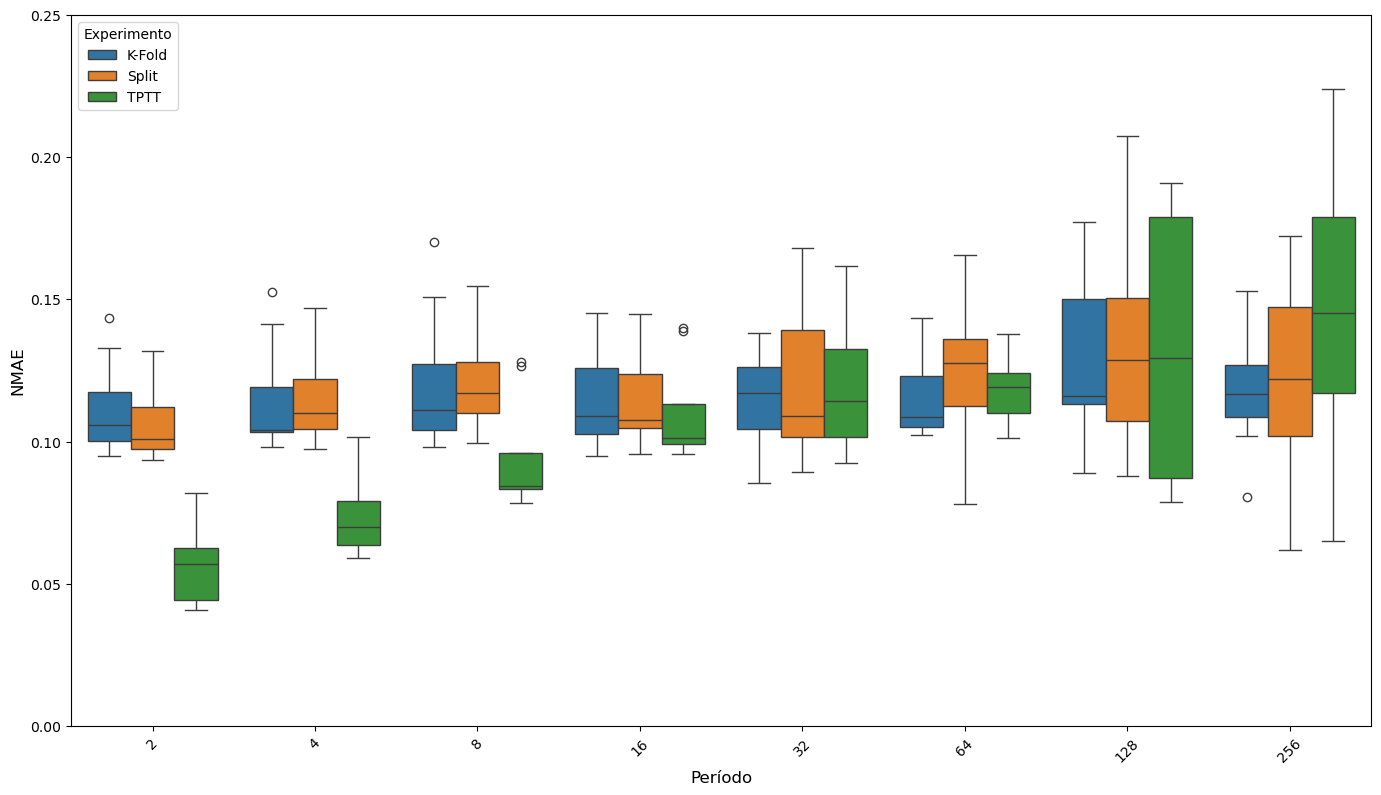

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reference_split = pd.read_csv(f'agg_function_periodic_experiment_y_original/2025-01-06T17:07:48/minimal_with_univariate.csv', index_col=False)
reference_tptt = pd.read_csv(f'agg_function_periodic_experiment_y_original_tptt/2025-01-20T19:47:13/minimal_with_univariate.csv', index_col=False)
data['Experimento'] = 'K-Fold'
reference_split['Experimento'] = 'Split'
reference_tptt['Experimento'] = 'TPTT'
data_combined = pd.concat([data, reference_split,  reference_tptt], ignore_index=True)




y_limits = (0, 0.25)
plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data_combined[data_combined['função'] == 'média'], hue='Experimento')

plt.xlabel("Período", fontsize=12)
plt.ylabel("NMAE", fontsize=12)
#plt.title("NMAE Janelas de Funções por período", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(y_limits)
plt.show()

/tmp/ipykernel_35573/1577596719.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media['Caso'] = 'Média - Seleção de Caraterísticas'
/tmp/ipykernel_35573/1577596719.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_sem_fs['Caso'] = 'Média'


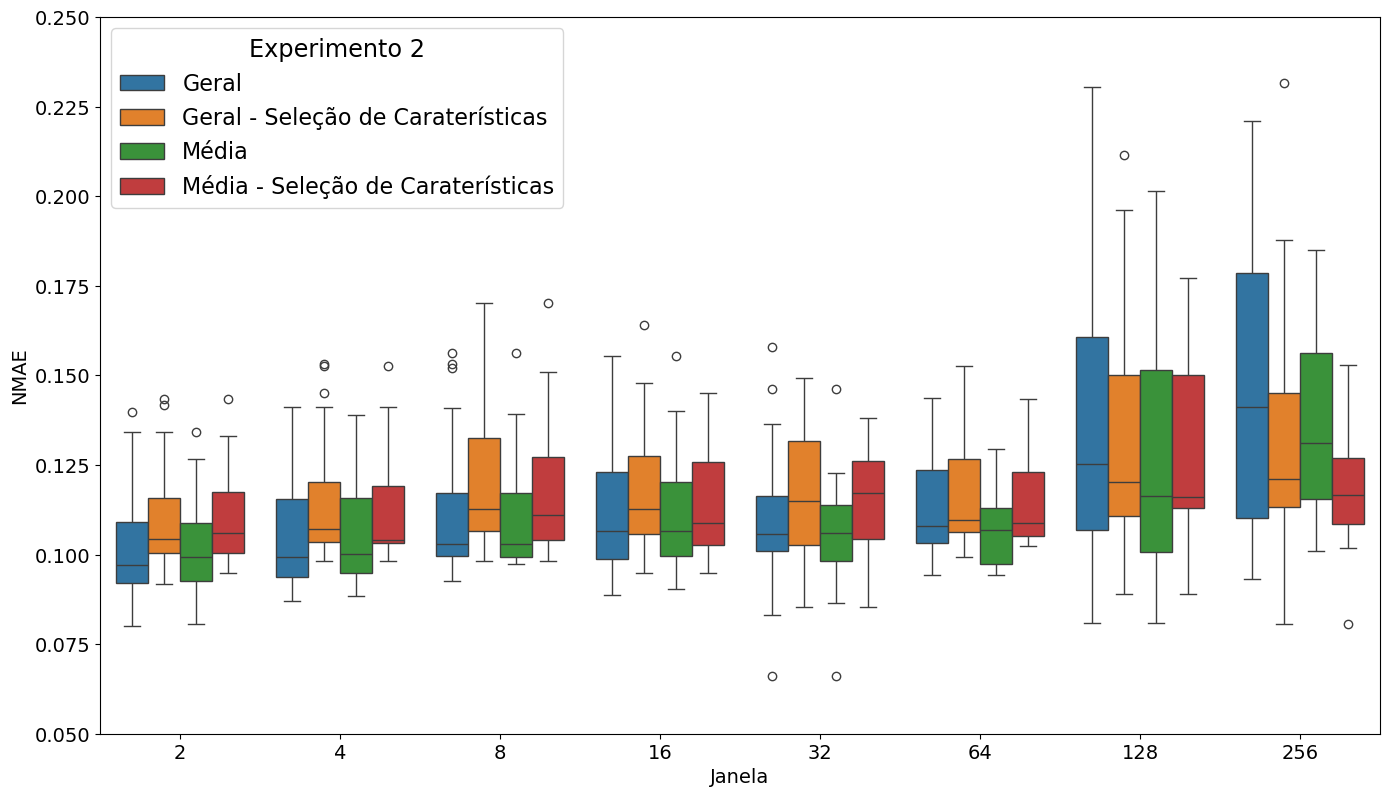

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

total_X = pd.read_csv(f'agg_function_periodic_experiment_y_original_k_fold/2025-02-17T22:21:53/total_X.csv', index_col=False)

data['Caso'] = 'Geral - Seleção de Caraterísticas'
total_X['Caso'] = 'Geral'
media = data[data['função'] == 'média']
media['Caso'] = 'Média - Seleção de Caraterísticas'
media_sem_fs = total_X[total_X['função'] == 'média']
media_sem_fs['Caso'] = 'Média'


data_combined = pd.concat([total_X, data, media_sem_fs, media], ignore_index=True)



y_limits = (0.05, 0.25)
plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data_combined, hue='Caso')

plt.xlabel("Janela", fontsize=14)
plt.ylabel("NMAE", fontsize=14)
#plt.title("NMAE Janelas de Funções por período", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.rcParams['legend.title_fontsize'] = 'xx-large'

plt.legend(title='Experimento 2', prop={'size': 16})

plt.tight_layout()


plt.ylim(y_limits)
plt.show()

In [10]:
group_by_method = data.groupby(["período", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [11]:
group_by_method['std'] = round(100*group_by_method['std'], 0)
group_by_method['mean'] = round(100*group_by_method['mean'], 0)

In [12]:
group_by_method

,período,método,mean,std
0,2,RF,6.0,1.0
1,2,RT,4.0,1.0
2,4,RF,7.0,1.0
3,4,RT,7.0,1.0
4,8,RF,9.0,2.0
5,8,RT,9.0,2.0
6,16,RF,11.0,2.0
7,16,RT,11.0,2.0
8,32,RF,11.0,2.0
9,32,RT,11.0,2.0


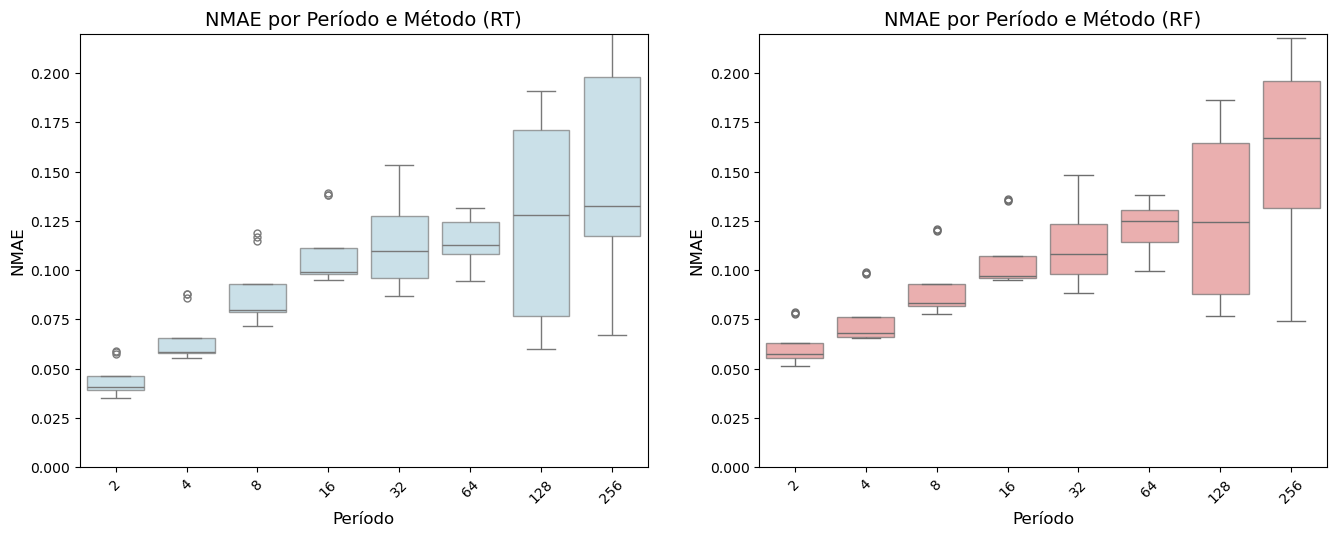

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.22)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RT'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Método (RT)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RF'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Método (RF)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

plt.tight_layout(pad=3.0)

plt.show()
